<div style="text-align:center; font-size:50px;">
    <b>TECHNOHACKS</b>
</div>


---

## ***Task 3 - Spam Detection*** 

---

# Importing Dependicies

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\Irshad Yasseen A\Documents\ML\datasets\Classification\Nlp\spam.csv",encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## SELECTING ONLY THE NECESSARY FEATURES

In [4]:
df=df.iloc[:,:-3]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.v1.value_counts().tolist()

[4825, 747]

# Visualization 

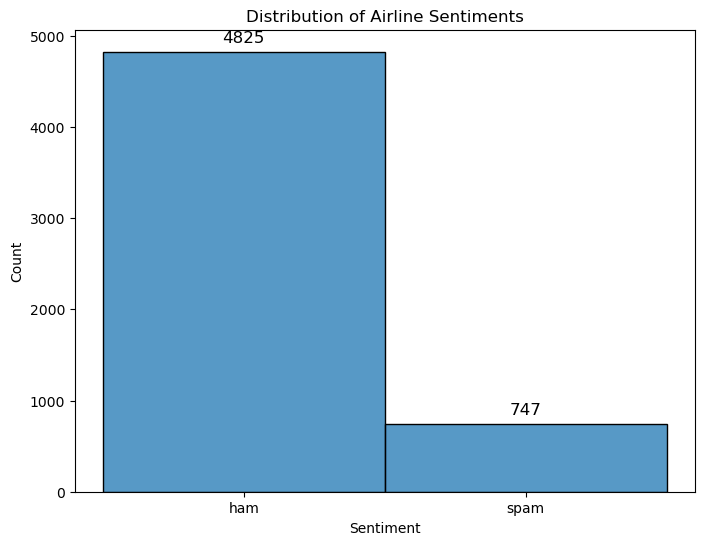

In [27]:
import seaborn as sns 
# Count the occurrences of each sentiment category
sentiment_counts = df['v1'].value_counts()

# Visualize the distribution using a histogram with counts on bars
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['v1'], bins=2, discrete=True)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Airline Sentiments')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

plt.xticks()
plt.show()


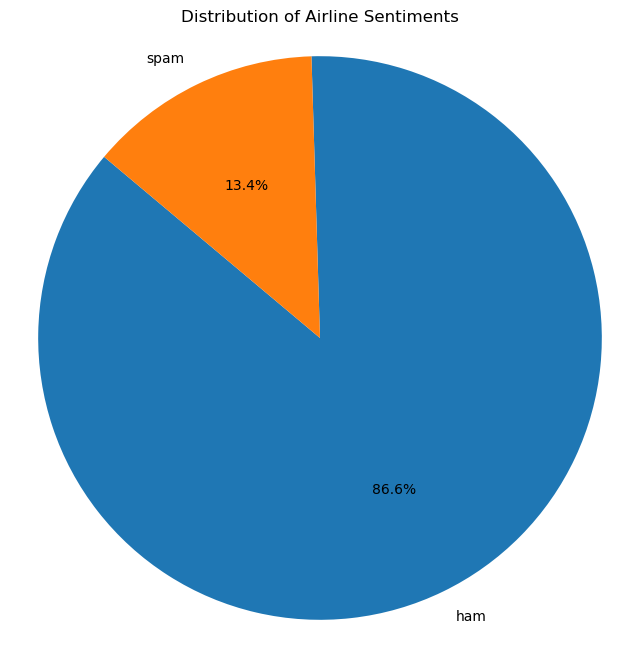

In [30]:
sentiment_counts = df['v1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [7]:
df.replace({'ham':0,
            "spam":1},inplace=True)

In [8]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# NLP Dependencies 

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [32]:
stops=set(stopwords.words("english"))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Text Preprocesing

In [33]:
ps=PorterStemmer()
def prep(text):
    text=text.lower()
    text=re.sub("[^a-zA-Z]"," ",text)
    text=text.strip().split()
    corpus=[ps.stem(word) for word in text if word not in stops]
    return(" ".join(corpus))



In [10]:
df.v2[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
prep(df.v2[10])

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [13]:
df['corpus']=df['v2'].apply(prep)

In [14]:
df

,v1,v2,corpus
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


# Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
xc=cv.fit_transform(df['corpus']).toarray() 
xc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer()   
x=tfv.fit_transform(df['v2']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
x.shape

(5572, 8672)

In [19]:
set(tfv.get_feature_names_out())

{'subs16',
 '2nite',
 'dinero',
 'buffet',
 'entertain',
 'turkeys',
 'tap',
 'birthday',
 'delete',
 'treatin',
 'didn',
 'ystrday',
 'internal',
 'results',
 'mwahs',
 'tones2you',
 'ey',
 'select',
 'spoon',
 'organizer',
 'this',
 'barrel',
 'answered',
 '0121',
 'curfew',
 'w1a',
 'karaoke',
 'kanagu',
 'wednesday',
 'month',
 'cut',
 'forgiveness',
 'merry',
 'might',
 'rpl',
 'srt',
 'guai',
 'lil',
 'instructions',
 'ls15hb',
 'nag',
 'poor',
 'sexiest',
 'unfolds',
 'pocked',
 'bout',
 'ilol',
 'baig',
 'erm',
 'wicket',
 'smokes',
 'uup',
 'hot',
 'blood',
 'speling',
 '2mrw',
 'busty',
 'harry',
 'adsense',
 'stylish',
 'salt',
 'replied',
 '24m',
 'hole',
 'depressed',
 'temple',
 'room',
 '2gthr',
 'zhong',
 'spinout',
 'marvel',
 'reverse',
 'insurance',
 '02072069400',
 'thinked',
 'iscoming',
 'happen',
 'per',
 'sue',
 'cd',
 'ive',
 'november',
 'yupz',
 'batchlor',
 'reply',
 'aids',
 'hurry',
 'exist',
 'free2day',
 'soft',
 'colany',
 '220cm2',
 'cashto',
 '7cfca1a

In [20]:
y=df.v1
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress tracking

# Create an empty DataFrame to store confusion matrices
confusion_matrices = pd.DataFrame(columns=['Model', 'Confusion_Matrix'])

results = []

X_TO_SCORE = xc  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('SVM - Linear Kernel', SVC(kernel='linear')),               # Linear kernel for text classification
    ('SVM - RBF Kernel', SVC(kernel='rbf')),                     # RBF kernel (Gaussian) for text classification
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Gaussian Naive Bayes', GaussianNB()),                      # Gaussian Naive Bayes for text classification
    ('Complement Naive Bayes', ComplementNB()),                  # Complement Naive Bayes for text classification
    ('Bernoulli Naive Bayes', BernoulliNB())                     # Bernoulli Naive Bayes for text classification
]

# Initialize tqdm to track progress
for name, model in tqdm(models, desc='Processing Models'):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Make predictions using cross-validation
    y_pred = cross_val_predict(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Calculate confusion matrix
    cm = confusion_matrix(Y_TO_SCORE, y_pred)
    
    
    results.append(
        {
            "model": name,
            "Cross_Validation_Score": cv_scores.mean(),
            
        }
    )
    
    # Append confusion matrix to the separate DataFrame
    confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)

re_df = pd.DataFrame(results)


Processing Models:   0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\2516010692.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)
Processing Models:  11%|█         | 1/9 [00:04<00:36,  4.62s/it]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\2516010692.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)
Processing Models:  22%|██▏       | 2/9 [00:40<02:40, 22.93s/it]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\2516010692.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_matric

In [25]:
xc.shape

(5572, 6221)

In [22]:
re_df

,model,Cross_Validation_Score
0,Logistic Regression,0.980617
1,Decision Tree Classifier,0.970387
2,Random Forest Classifier,0.973977
3,SVM - Linear Kernel,0.981336
4,SVM - RBF Kernel,0.975233
5,Multinomial Naive Bayes,0.975772
6,Gaussian Naive Bayes,0.874193
7,Complement Naive Bayes,0.937905
8,Bernoulli Naive Bayes,0.974156


In [23]:
cm

array([[4799,   26],
       [ 118,  629]], dtype=int64)

In [24]:

# Create an empty DataFrame to store confusion matrices
confusion_matrices = pd.DataFrame(columns=['Model', 'Confusion_Matrix'])

results = []

X_TO_SCORE = x  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('SVM - Linear Kernel', SVC(kernel='linear')),               # Linear kernel for text classification
    ('SVM - RBF Kernel', SVC(kernel='rbf')),                     # RBF kernel (Gaussian) for text classification
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Gaussian Naive Bayes', GaussianNB()),                      # Gaussian Naive Bayes for text classification
    ('Complement Naive Bayes', ComplementNB()),                  # Complement Naive Bayes for text classification
    ('Bernoulli Naive Bayes', BernoulliNB())                     # Bernoulli Naive Bayes for text classification
]

# Initialize tqdm to track progress
for name, model in tqdm(models, desc='Processing Models'):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Make predictions using cross-validation
    y_pred = cross_val_predict(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Calculate confusion matrix
    cm = confusion_matrix(Y_TO_SCORE, y_pred)
    
    
    results.append(
        {
            "model": name,
            "Cross_Validation_Score": cv_scores.mean(),
            
        }
    )
    
    # Append confusion matrix to the separate DataFrame
    confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)

re_df = pd.DataFrame(results)


Processing Models:   0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\3828122936.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)
Processing Models:  11%|█         | 1/9 [00:04<00:37,  4.65s/it]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\3828122936.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)
Processing Models:  22%|██▏       | 2/9 [01:07<04:34, 39.16s/it]C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_30820\3828122936.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [26]:
re_df

,model,Cross_Validation_Score
0,Logistic Regression,0.957466
1,Decision Tree Classifier,0.963747
2,Random Forest Classifier,0.976668
3,SVM - Linear Kernel,0.982591
4,SVM - RBF Kernel,0.974515
5,Multinomial Naive Bayes,0.954415
6,Gaussian Naive Bayes,0.902369
7,Complement Naive Bayes,0.968234
8,Bernoulli Naive Bayes,0.979002


Text(50.722222222222214, 0.5, 'True')

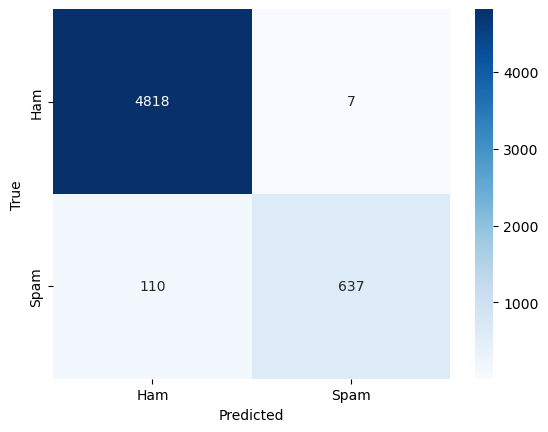

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,
            fmt="0",
            cmap="Blues",
            xticklabels={"Ham","Spam"},
            yticklabels={"Ham","Spam"})
plt.xlabel("Predicted")
plt.ylabel("True")


Text(50.722222222222214, 0.5, 'True')

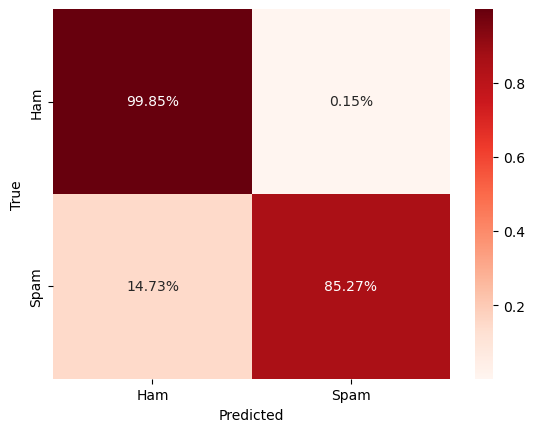

In [85]:
cm1=confusion_matrix(y,y_pred,normalize="true")
sns.heatmap(cm1,annot=True,
            fmt="0.2%",
            cmap="Reds",
            xticklabels={"Ham","Spam"},
            yticklabels={"Ham","Spam"})
plt.xlabel("Predicted")
plt.ylabel("True")
